In [ ]:
#Linear Regression

In [16]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pylab as pl

In [17]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [18]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [19]:
df1=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


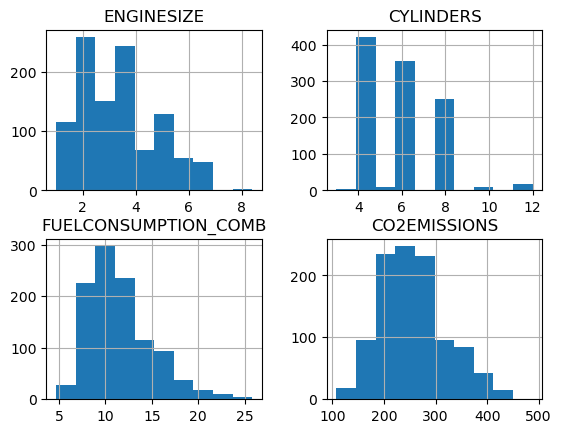

In [20]:
df1.hist()
plt.show()

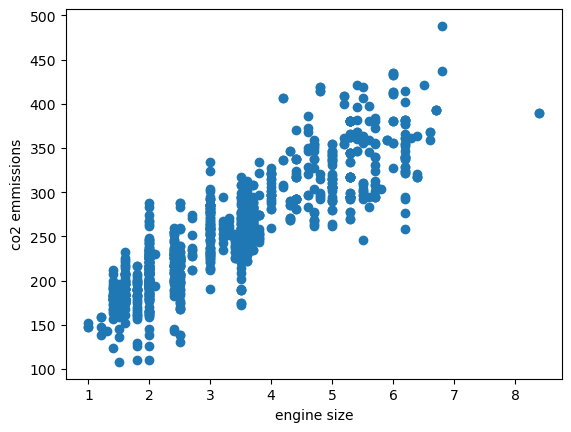

In [21]:
plt.scatter(df1["ENGINESIZE"],df1["CO2EMISSIONS"])
plt.xlabel("engine size")
plt.ylabel("co2 emmissions");


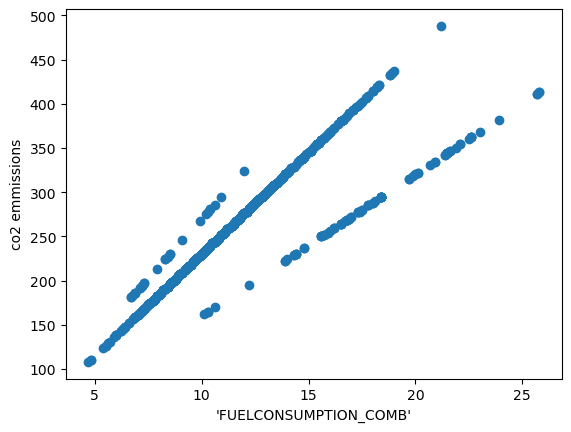

In [22]:
plt.scatter(df1['FUELCONSUMPTION_COMB'],df1["CO2EMISSIONS"])
plt.xlabel("'FUELCONSUMPTION_COMB'")
plt.ylabel("co2 emmissions");

In [23]:
#to truncate data to make Train_data and Test_data
mask =np.random.rand(len(df1)) <0.8
mask[:5]
train = df1[mask]
test = df1[~mask]
print("the length of Train_data is :",len(train))
print("the length of Test_data is :",len(test))

the length of Train_data is : 863
the length of Test_data is : 204


In [24]:
#or we use another wy to make Train_data and Test_data
y=int(len(df1)*0.8)

x= df.iloc[ :y]
z = df.iloc[y:]
print("the length of Train_data is :",len(x))
print("the length of Test_data is :",len(z))

the length of Train_data is : 853
the length of Test_data is : 214


In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_train = np.asanyarray(train[["ENGINESIZE"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])
model.fit(X_train,y_train)
print("the coefficient =",np.round(model.coef_,1))
print("intercept =",np.round(model.intercept_,1))

the coefficient = [[39.]]
intercept = [125.3]


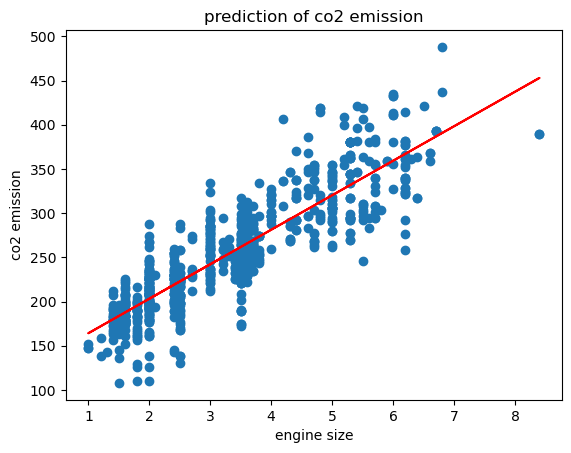

In [26]:
plt.scatter(train["ENGINESIZE"],train["CO2EMISSIONS"])
plt.plot(X_train,model.coef_*X_train + model.intercept_,"-r")#Y=aX+b  ----> a:coef and b:intercept
plt.xlabel("engine size")
plt.ylabel("co2 emission")
plt.title("prediction of co2 emission");

In [27]:
p=model.predict(X_train)
v=model.coef_[0][0]*X_train + model.intercept_[0]
print(p[:10],"\n")
print(v[:10])

[[203.26715314]
 [218.8684236 ]
 [183.76556507]
 [261.77191734]
 [261.77191734]
 [261.77191734]
 [261.77191734]
 [269.57255257]
 [218.8684236 ]
 [218.8684236 ]] 

[[203.26715314]
 [218.8684236 ]
 [183.76556507]
 [261.77191734]
 [261.77191734]
 [261.77191734]
 [261.77191734]
 [269.57255257]
 [218.8684236 ]
 [218.8684236 ]]


In [28]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
X_test = np.asanyarray(test[["ENGINESIZE"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])
y_test_predict = model.predict(X_test)
print("the accuracy of our model is : ",r2_score(y_test_predict,y_test))
print("Mean Absolute Error = " , np.mean(np.absolute(y_test_predict-y_test)))
print("Mean Absolute Error = " , mean_absolute_error(y_test_predict,y_test))
print("mean square error = " , np.mean(np.power(y_test_predict - y_test,2)))
print("mean square error = " , mean_squared_error(y_test_predict,y_test))


the accuracy of our model is :  0.703865424486455
Mean Absolute Error =  22.823783210915998
Mean Absolute Error =  22.823783210915998
mean square error =  904.7737305179562
mean square error =  904.7737305179562


In [ ]:
#logistic Regression

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report , jaccard_score , confusion_matrix ,ConfusionMatrixDisplay ,log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 

In [2]:
df = pd.read_csv("customer_churn_dataset-testing-master.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [3]:
#to convert data of gender (male,female) into (0,1) to make logistic regression
df["Gender"]=preprocessing.LabelEncoder().fit(["Female","Male"]).transform(df["Gender"])
#to convert Subscription Type into label data as (0,1,2)
df["Subscription Type"]= preprocessing.LabelEncoder().fit(["Standard","Basic","Premium"]).transform(df["Subscription Type"])
#to convert contract length ("Monthly","Annual","Quarterly") into (0,1,2)
df["Contract Length"] = preprocessing.LabelEncoder().fit(["Monthly","Annual","Quarterly"]).transform(df["Contract Length"])
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,0,1,598,9,1
1,2,41,0,28,28,7,13,2,1,584,20,0
2,3,47,1,27,10,2,29,1,0,757,21,0
3,4,35,1,9,12,5,17,1,2,232,18,0
4,5,53,0,58,24,9,2,2,0,533,18,0


In [4]:
x= df[['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction']]
y=df["Churn"]
print("x_shape " ,x.shape)
print("y_shape ",y.shape)

x_shape  (64374, 11)
y_shape  (64374,)


In [5]:
# to generate random data in x and y
x_data = np.asarray(x)
print(x_data[:5])
y_data = np.asarray(y)
print(y_data[:5])

[[  1  22   0  25  14   4  27   0   1 598   9]
 [  2  41   0  28  28   7  13   2   1 584  20]
 [  3  47   1  27  10   2  29   1   0 757  21]
 [  4  35   1   9  12   5  17   1   2 232  18]
 [  5  53   0  58  24   9   2   2   0 533  18]]
[1 0 0 0 0]


In [6]:
x_data = preprocessing.StandardScaler().fit(x_data).transform(x_data)
x_data[:2]

array([[-1.7320239 , -1.43420211, -0.93482484, -0.40909964, -0.12252553,
        -0.44980683,  1.11453793, -1.22518771,  0.01104616,  0.21840769,
        -0.75232377],
       [-1.73197009, -0.0697304 , -0.93482484, -0.23364156,  1.46542392,
         0.51359033, -0.46700013,  1.22324795,  0.01104616,  0.16474168,
         0.52106473]])

In [7]:
#to split data into train_data and test_data
x_train , x_test , y_train , y_test  =train_test_split(x_data , y_data , test_size=0.2 , random_state=4)
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_text shape :",x_test.shape)
print("y_text shape :",y_test.shape)

x_train shape :  (51499, 11)
y_train shape :  (51499,)
x_text shape : (12875, 11)
y_text shape : (12875,)


In [11]:
# we use LogisticRegression in c =0.01 because smaller values specify stronger regularization.
model = LogisticRegression(C=0.01)
model.fit(x_train,y_train)
print(model)

LogisticRegression(C=0.01)


In [12]:
y_pred = model.predict(x_test)
print(y_pred[:10])
print(y_test[:10])

[0 1 0 1 0 0 0 0 1 0]
[0 1 0 1 0 0 0 1 1 0]


In [13]:
y_pred_prapola = model.predict_proba(x_test)
y_pred_prapola[:5]

array([[0.61276704, 0.38723296],
       [0.01615082, 0.98384918],
       [0.64409416, 0.35590584],
       [0.03685152, 0.96314848],
       [0.90755214, 0.09244786]])

In [15]:
jaccard = jaccard_score(y_test,y_pred)
print("the jaccard accuarcy is :",jaccard)

the jaccard accuarcy is : 0.7394132100014453


In [13]:
cm = confusion_matrix(y_test,y_pred,labels=[1,0])
print("the confusion matrix is :\n", cm)
ConfusionMatrixDisplay(cm)

the confusion matrix is :
 [[5116  925]
 [ 878 5956]]


In [14]:
log = log_loss(y_test,y_pred)
print("log loss score is : " , log )

log loss score is :  5.047511228006076


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6834
           1       0.85      0.85      0.85      6041

    accuracy                           0.86     12875
   macro avg       0.86      0.86      0.86     12875
weighted avg       0.86      0.86      0.86     12875



In [ ]:
#Support Vector Machine (SVM)

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report , jaccard_score,f1_score , confusion_matrix ,ConfusionMatrixDisplay ,log_loss
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn import preprocessing 

In [30]:
df = pd.read_csv("cell_samples.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [31]:
df["BareNuc"]= df["BareNuc"].notnull()
df["BareNuc"] = preprocessing.LabelEncoder().fit(df["BareNuc"]).transform(df["BareNuc"].astype(int))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           699 non-null    int64
 1   Clump        699 non-null    int64
 2   UnifSize     699 non-null    int64
 3   UnifShape    699 non-null    int64
 4   MargAdh      699 non-null    int64
 5   SingEpiSize  699 non-null    int64
 6   BareNuc      699 non-null    int64
 7   BlandChrom   699 non-null    int64
 8   NormNucl     699 non-null    int64
 9   Mit          699 non-null    int64
 10  Class        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [32]:
x = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x_data = np.asarray(x)
x_data[:5]

array([[5, 1, 1, 1, 2, 0, 3, 1, 1],
       [5, 4, 4, 5, 7, 0, 3, 2, 1],
       [3, 1, 1, 1, 2, 0, 3, 1, 1],
       [6, 8, 8, 1, 3, 0, 3, 7, 1],
       [4, 1, 1, 3, 2, 0, 3, 1, 1]], dtype=int64)

In [33]:
x_data = preprocessing.StandardScaler().fit(x_data).transform(x_data)
x_data[:5]

array([[ 0.20693572, -0.69999505, -0.74329904, -0.63324716, -0.54956136,
         0.        , -0.17966213, -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 ,  0.76862067,  1.71010564,
         0.        , -0.17966213, -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, -0.63324716, -0.54956136,
         0.        , -0.17966213, -0.61182504, -0.34391178],
       [ 0.56233637,  1.59563215,  1.61377302, -0.63324716, -0.09762796,
         0.        , -0.17966213,  1.35445405, -0.34391178],
       [-0.14846494, -0.69999505, -0.74329904,  0.06768675, -0.54956136,
         0.        , -0.17966213, -0.61182504, -0.34391178]])

In [34]:
y = df["Class"]
y_data = np.asarray(y)
y_data[:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [35]:
#to truncate data into 80% to Train_data and 20% to test_data 
x_train , x_test , y_train , y_test = train_test_split(x_data,y_data,train_size=0.8 , random_state=4)
print("the training data is : ",x_train.shape ,y_train.shape )
print("the validation data i s :" , x_test.shape , y_test.shape)

the training data is :  (559, 9) (559,)
the validation data i s : (140, 9) (140,)


In [36]:
model = svm.SVC(kernel="sigmoid",gamma="auto")
model.fit(x_train,y_train)

SVC(gamma='auto', kernel='sigmoid')

In [37]:
y_pred = model.predict(x_test)
print("true data is :     " , y_test[:20])
print("predicted data is :" , y_pred[:20])

true data is :      [4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2]
predicted data is : [4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 2 2 2 2 2]


In [38]:
#to convert data (2,4) into (0,1) to know accuracy such as jaccord_score and f1_score
y_test=preprocessing.LabelEncoder().fit([2,4]).transform(y_test)
y_pred=preprocessing.LabelEncoder().fit([2,4]).transform(y_pred)
print(y_test)
print(y_pred)

[1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1]
[1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0
 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1]


In [39]:
jaccard = jaccard_score(y_test,y_pred)
print(" the jaccard index is : ", jaccard)

 the jaccard index is :  0.8392857142857143


In [40]:
f_score = f1_score(y_test,y_pred)
print("f1 score is : ", f_score)

f1 score is :  0.9126213592233009


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        88
           1       0.92      0.90      0.91        52

    accuracy                           0.94       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140

